<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Transaction_Analysis_Report_in_the_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn


<ipython-input-2-9ecfe50ae664>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  transaction_dates = pd.date_range(start='2023-01-01', periods=n_transactions, freq='H')


  Transaction_Date  Total_Transactions  Average_Transaction_Value
0       2023-01-01                  24                  41.952719
1       2023-01-02                  24                  44.092304
2       2023-01-03                  24                  56.793163
3       2023-01-04                  24                  44.739722
4       2023-01-05                  24                  44.235474


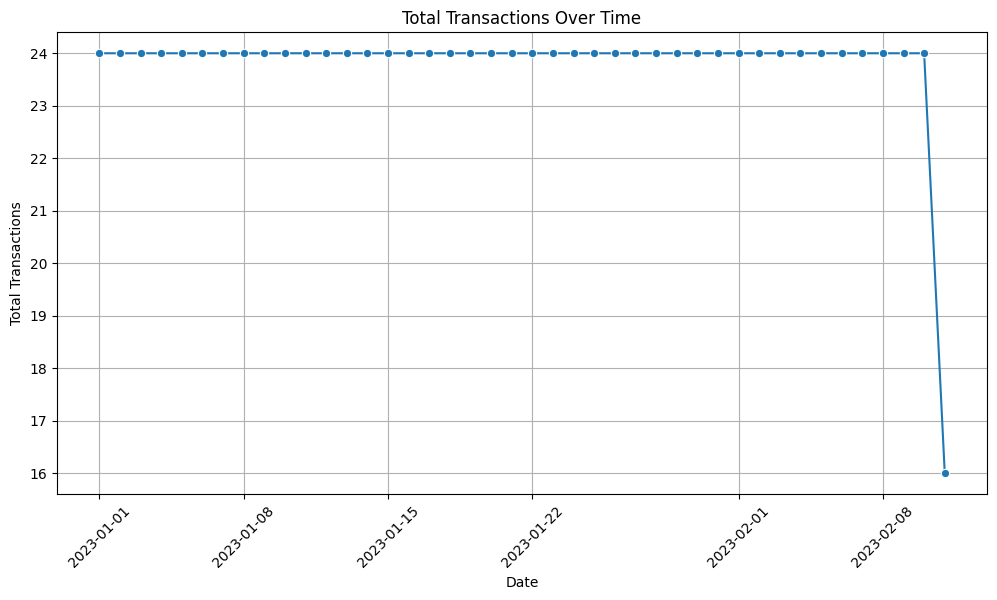

Number of outlier transactions: 18
       Transaction_Date  Transaction_Value Transaction_Type   Z_Score
69  2023-01-03 21:00:00         216.707317          Deposit  3.456664
154 2023-01-07 10:00:00         212.201849       Withdrawal  3.364008
261 2023-01-11 21:00:00         230.528487       Withdrawal  3.740902
390 2023-01-17 06:00:00         232.850245       Withdrawal  3.788649
441 2023-01-19 09:00:00         215.772928       Withdrawal  3.437448


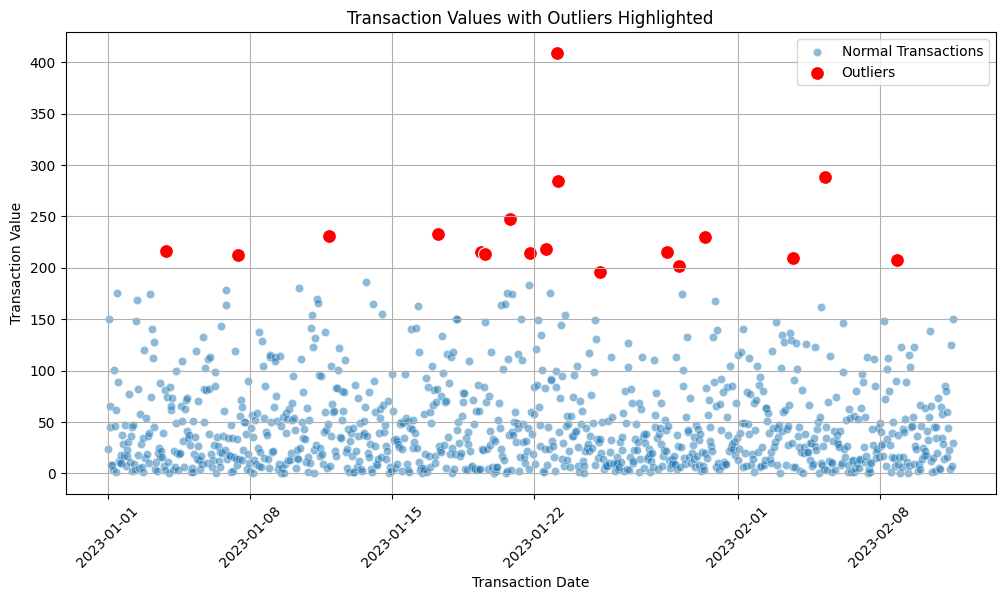

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a random seed for reproducibility
np.random.seed(42)

# Simulating a transaction dataset
n_transactions = 1000
transaction_dates = pd.date_range(start='2023-01-01', periods=n_transactions, freq='H')
transaction_values = np.random.exponential(scale=50, size=n_transactions)  # Exponential distribution for values
transaction_types = np.random.choice(['Deposit', 'Withdrawal'], size=n_transactions)

# Creating a DataFrame
transactions = pd.DataFrame({
    'Transaction_Date': transaction_dates,
    'Transaction_Value': transaction_values,
    'Transaction_Type': transaction_types
})

# Analyzing transaction volume and average value
transaction_summary = transactions.groupby(transactions['Transaction_Date'].dt.date).agg(
    Total_Transactions=('Transaction_Value', 'size'),
    Average_Transaction_Value=('Transaction_Value', 'mean')
).reset_index()

print(transaction_summary.head())

# Plotting transaction volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=transaction_summary, x='Transaction_Date', y='Total_Transactions', marker='o')
plt.title('Total Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Analyzing anomalies using z-scores
mean_value = transactions['Transaction_Value'].mean()
std_value = transactions['Transaction_Value'].std()
transactions['Z_Score'] = (transactions['Transaction_Value'] - mean_value) / std_value

# Identifying outliers (e.g., Z-Score > 3)
outliers = transactions[transactions['Z_Score'].abs() > 3]

print(f"Number of outlier transactions: {len(outliers)}")
print(outliers[['Transaction_Date', 'Transaction_Value', 'Transaction_Type', 'Z_Score']].head())

# Plotting transaction values with outliers highlighted
plt.figure(figsize=(12, 6))
sns.scatterplot(data=transactions, x='Transaction_Date', y='Transaction_Value', label='Normal Transactions', alpha=0.5)
sns.scatterplot(data=outliers, x='Transaction_Date', y='Transaction_Value', color='red', label='Outliers', s=100)
plt.title('Transaction Values with Outliers Highlighted')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()
